In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lls import LLS

In [2]:
companies = pd.read_csv("1000_Companies.csv")

In [3]:
companies.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
companies.drop("State", axis = 1, inplace = True)

In [8]:
companies.tail()

,R&D Spend,Administration,Marketing Spend,Profit
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000
999,161181.72,270939.860,295442.1700,476485.43000


In [7]:
companies.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [8]:
x = companies["R&D Spend"]
y = companies["Profit"]
lls = LLS(x, y)

In [19]:
lls.fit()

array([[1.31862877]])

In [26]:
x_test = 116000
output = lls.predict(x_test)

In [27]:
output

array([[152960.93756373]])

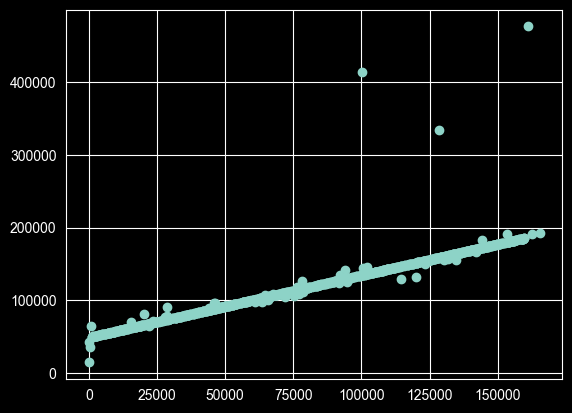

In [25]:
plt.scatter(x, y)
plt.scatter(x_test, output, color = "red")
plt.show()

In [ ]:
x = np.array(companies["R&D Spend"])
y = np.array(companies["Profit"])

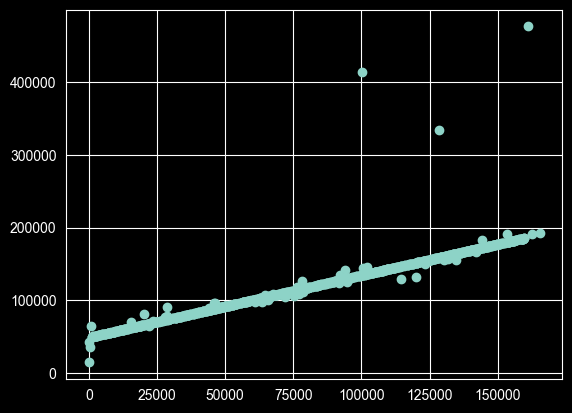

In [68]:
plt.scatter(x, y)
plt.show()

In [70]:
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [71]:
x = x.reshape(-1,1)
x.shape

(1000, 1)

In [72]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
w

array([[1.31862877]])

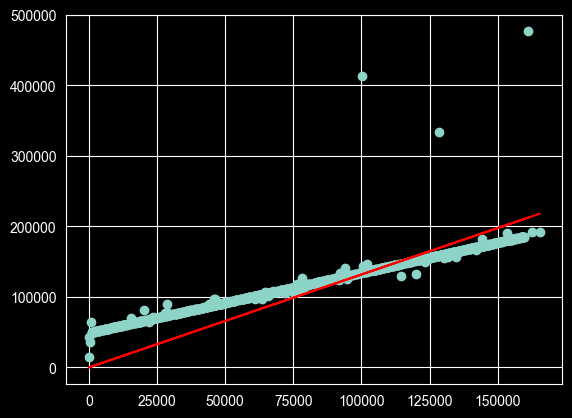

In [73]:
plt.scatter(x, y)
plt.plot(x, w * x, color = "red")
plt.show()

In [83]:
new_RandD = 116000
x_new = new_RandD
y_pred = w * x_new
print(y_pred)

[[152960.93756373]]


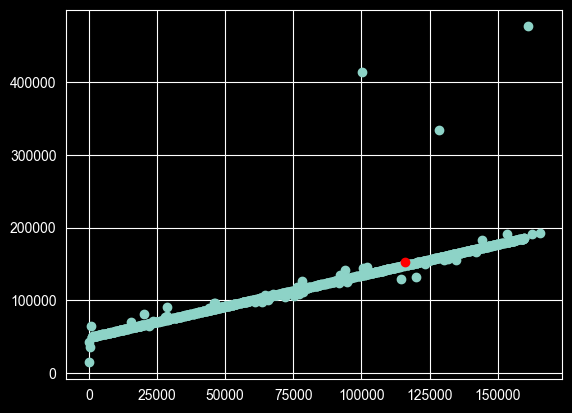

In [84]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred, color = "red" )
plt.show()